# **Import Library**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.sample()

C:\Users\Dimas\AppData\Local\Temp\ipykernel_2460\1963623967.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
80469,80469,7706224,9408294,7125,7125,7125.0,36 months,11.99,236.62,B,B3,Eft operations,6 years,RENT,30000.0,Not Verified,Oct-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,900xx,CA,9.64,0.0,Aug-01,0.0,51.0,96.0,13.0,1.0,6282,40.0,35.0,f,0.0,0.0,7334.36,7334.36,7125.0,209.36,0.0,0.0,0.0,Jan-14,6861.41,NaN,Jan-16,0.0,51.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,6282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15700.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# **Missing Value**

In [5]:
# 0 non null
df.isna().all().sum()

17

In [6]:
full_null_col = [col for col in df.columns if df[col].isnull().all()]
df = df.drop(full_null_col, axis=1)

In [7]:
df.isna().all().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
# viewing the percentage of missing values
precentage = df.isnull().sum()*100/len(df)
dtypes=[df[col].dtype for col in df.columns]
missing_value_df = pd.DataFrame({'data_type':dtypes,
                                 'precentage': precentage})
missing_value_df.sort_values('precentage', ascending=False, inplace=True)
missing_value_df.head(10)

,data_type,precentage
mths_since_last_record,float64,86.566585
mths_since_last_major_derog,float64,78.773926
desc,object,72.981975
mths_since_last_delinq,float64,53.690554
next_pymnt_d,object,48.728567
tot_cur_bal,float64,15.071469
tot_coll_amt,float64,15.071469
total_rev_hi_lim,float64,15.071469
emp_title,object,5.916553
emp_length,object,4.505399


# **Duplicated Data**

In [10]:
df.duplicated().sum()

0

# **Data Preparation**

## Handling Missing Values

In [11]:
# drop columns mths_since_last_record, desc, next_pymnt_d 
df.drop(columns=['mths_since_last_record', 'desc', 'next_pymnt_d'] ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [12]:
# numeric col missing value >50%
for col in ['mths_since_last_major_derog','mths_since_last_delinq']:
    df[col].fillna(value=0,inplace=True)

In [13]:
# fill with median
for col in df.select_dtypes(exclude='object'):
    df[col]= df[col].fillna(df[col].median())

In [14]:
# categorical col
for col in df.select_dtypes(include='object'):
    df[col].fillna(value='Unknown', inplace=True)

In [15]:
df.isna().sum()

Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec   

## Formatting Target Variable

In this case, I am grouping the values of the loan_status column into 2 groups for classification.

In [16]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

##### In this case I grouped them into two, namely good_loan(1) and bad_loan(0)
##### good_loan(1) = 'Fully Paid','Does not meet the credit policy. Status:Fully Paid'
##### bad_loan(0) = 'Charged Off','Default', 'Late (31-120 days)','Does not meet the credit policy. Status:Charged Off',
##### Apart from that, I will delete it because the status is still ongoing and cannot be said to be a good loan or bad loan.

In [17]:
df['loan_status'].replace({'Fully Paid': 1,
                           'Does not meet the credit policy. Status:Fully Paid': 1,
                           'Charged Off': 0,
                           'Default': 0,
                           'Late (31-120 days)': 0,
                           'Does not meet the credit policy. Status:Charged Off': 0},
                          inplace=True)

df = df[df['loan_status'].isin([0, 1])]
df.reset_index(drop=True, inplace=True)

# Replace 1 with "Good Loan" and 0 with "Bad Loan"
df['loan_status'].replace({1: 'Good Loan', 0: 'Bad Loan'}, inplace=True)

In [18]:
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
237690,466276,9695736,11547808,8525,8525,8525.0,60 months,18.25,217.65,D,D3,MANAGER,5 years,MORTGAGE,37536.0,Verified,Jan-14,Bad Loan,n,https://www.lendingclub.com/browse/loanDetail....,medical,Medical expenses,011xx,MA,12.28,4.0,Nov-94,0.0,3.0,12.0,0.0,5318,10.7,26.0,f,0.0,0.0,2029.930000,2029.93,360.08,510.45,0.0,1159.4,11.594,May-14,217.65,Oct-14,0.0,4.0,1,INDIVIDUAL,0.0,0.0,116995.0,49800.0
237691,466277,9007579,10799568,18000,18000,17975.0,36 months,7.90,563.23,A,A4,sales rep,3 years,RENT,90000.0,Verified,Jan-14,Bad Loan,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,my loan,212xx,MD,10.33,1.0,Jul-98,0.0,14.0,16.0,0.0,8224,16.3,33.0,f,0.0,0.0,5631.670000,5623.85,4580.89,1050.78,0.0,0.0,0.000,Nov-14,563.23,Oct-14,0.0,14.0,1,INDIVIDUAL,0.0,0.0,42592.0,50300.0
237692,466278,9745590,11597671,10000,10000,10000.0,36 months,18.25,362.78,D,D3,MecÃ¡nica,10+ years,RENT,42000.0,Source Verified,Jan-14,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,vacation,Vacation,201xx,VA,11.57,0.0,Jun-02,0.0,29.0,9.0,0.0,3196,28.8,24.0,f,0.0,0.0,12394.165200,12394.17,10000.00,2394.17,0.0,0.0,0.000,Sep-15,5501.60,Jan-16,0.0,32.0,1,INDIVIDUAL,0.0,0.0,10170.0,11100.0
237693,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Bad Loan,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,0.0,18.0,1.0,18238,46.3,30.0,f,0.0,0.0,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.000,Dec-14,17.50,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
237694,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Good Loan,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,21.0,0.0,11404,21.5,27.0,w,0.0,0.0,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.000,Dec-14,1500.68,Apr-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237695 entries, 0 to 237694
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   237695 non-null  int64  
 1   id                           237695 non-null  int64  
 2   member_id                    237695 non-null  int64  
 3   loan_amnt                    237695 non-null  int64  
 4   funded_amnt                  237695 non-null  int64  
 5   funded_amnt_inv              237695 non-null  float64
 6   term                         237695 non-null  object 
 7   int_rate                     237695 non-null  float64
 8   installment                  237695 non-null  float64
 9   grade                        237695 non-null  object 
 10  sub_grade                    237695 non-null  object 
 11  emp_title                    237695 non-null  object 
 12  emp_length                   237695 non-null  object 
 13 

## Checking Unique Values 

In [20]:
# numeric col
df.select_dtypes(exclude='object').nunique()

Unnamed: 0                     237695
id                             237695
member_id                      237695
loan_amnt                        1310
funded_amnt                      1313
funded_amnt_inv                  9558
int_rate                          505
installment                     43723
annual_inc                      18651
dti                              3908
delinq_2yrs                        23
inq_last_6mths                     28
mths_since_last_delinq            125
open_acc                           57
pub_rec                            12
revol_bal                       46385
revol_util                       1202
total_acc                         102
out_prncp                        7424
out_prncp_inv                    7452
total_pymnt                    226584
total_pymnt_inv                221076
total_rec_prncp                 50177
total_rec_int                  177583
total_rec_late_fee               5000
recoveries                      22773
collection_r

In [21]:
# Delete column that have most unique value
df.drop(columns=['Unnamed: 0','id','member_id','policy_code'],inplace=True)
df.drop(columns=['total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt','tot_cur_bal'],inplace=True)

In [22]:
# categorical col
df.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              129470
emp_length                 12
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 2
pymnt_plan                  2
url                    237695
purpose                    14
title                   49853
zip_code                  874
addr_state                 50
earliest_cr_line          635
initial_list_status         2
last_pymnt_d               99
last_credit_pull_d        104
application_type            1
dtype: int64

In [23]:
# drop collumn that have >500 unique
df.drop(columns=['emp_title','url','title','zip_code','application_type'],inplace=True)

In [24]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
df['term'].replace({' 36 months': 30, ' 60 months': 60}, inplace=True)

In [26]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [27]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [28]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       'Unknown'], dtype=object)

In [29]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [30]:
# Define a dictionary for aggregating variable
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df["home_ownership"] = df["home_ownership"].map(target_dict)

In [31]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [32]:
print(df['purpose'].unique())
print(df['purpose'].value_counts())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
purpose
debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: count, dtype: int64


- home_improvement, car, medical, wedding, moving, house, vacation, educational can be aggregated into private_use
- renewable_energy can be aggregated into other

In [33]:
target_dicts = {'debt_consolidation':'debt_consolidation',
                'credit_card':'credit_card', 'small_business': 'small_business',
                'major_purchase':'major_purchase', 'other':'other', 'renewable_energy':'other',
                'car':'private_use','wedding':'private_use','home_improvement':'private_use',
                'medical':'private_use','moving':'private_use','vacation':'private_use',
                'house':'private_use','educational':'private_use'}
df['purpose']=df['purpose'].map(target_dicts)

In [34]:
df['purpose'].value_counts()

purpose
debt_consolidation    138318
credit_card            47421
private_use            27348
other                  13891
major_purchase          5951
small_business          4766
Name: count, dtype: int64

## Datetime Setting

In [35]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
224041,10000,10000,10000.0,30,8.9,317.54,A,A5,5 years,RENT,65000.0,Not Verified,Mar-14,Bad Loan,n,credit_card,OK,18.69,0.0,Aug-97,0.0,47.0,9.0,0.0,4012,30.4,29.0,w,4773.83,4773.83,5226.17,0.0,0.0,0.0,Nov-15,Jan-16,0.0,0.0,0.0,0.0,13200.0


##### We need to modify several date columns to make them easier to read by the model.

The columns are issue_d, earliest_cr_line, last_pymnt_d, and last_credit_pull_d.

In [36]:
# The month which the loan was funded
df['issue_d'].value_counts()

issue_d
Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
          ... 
Aug-07      74
Jul-07      63
Sep-08      57
Sep-07      53
Jun-07      24
Name: count, Length: 91, dtype: int64

In [37]:
# The month the borrower's earliest reported credit line was opened
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-00    2027
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Dec-56       1
Oct-11       1
Apr-62       1
Nov-11       1
Nov-56       1
Name: count, Length: 635, dtype: int64

In [38]:
# Last month payment was received
df['last_pymnt_d'].value_counts()

last_pymnt_d
Jul-15    11703
Oct-15    11248
Sep-15    10204
Mar-15    10087
Jun-15    10078
          ...  
Jun-08       20
Mar-08       18
Jan-08       11
Feb-08        8
Dec-07        2
Name: count, Length: 99, dtype: int64

In [39]:
# The most recent month LC pulled credit for this loan
df['last_credit_pull_d'].value_counts()

last_credit_pull_d
Jan-16    100480
Dec-15     13771
Nov-15      8233
Sep-15      7982
Oct-15      7846
           ...  
Nov-07         3
Jul-08         1
May-08         1
Jun-08         1
Jul-07         1
Name: count, Length: 104, dtype: int64

In [40]:
# Set standart datetime
columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d','last_credit_pull_d']
for col in columns:
    df[col]=pd.to_datetime(df[col],format='%b-%y',errors='coerce')
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,2015-01-01
4,2011-12-01,2004-11-01,2015-01-01,2015-09-01


In [41]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].isna().sum()

issue_d                 0
earliest_cr_line       29
last_pymnt_d          376
last_credit_pull_d     23
dtype: int64

In [42]:
# Drop NaT, the data count before the drop is 237695
df.dropna(subset=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237268 entries, 0 to 237694
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    237268 non-null  int64         
 1   funded_amnt                  237268 non-null  int64         
 2   funded_amnt_inv              237268 non-null  float64       
 3   term                         237268 non-null  int64         
 4   int_rate                     237268 non-null  float64       
 5   installment                  237268 non-null  float64       
 6   grade                        237268 non-null  object        
 7   sub_grade                    237268 non-null  object        
 8   emp_length                   237268 non-null  object        
 9   home_ownership               237268 non-null  object        
 10  annual_inc                   237268 non-null  float64       
 11  verification_status          23

In [43]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].isna().sum()

issue_d               0
earliest_cr_line      0
last_pymnt_d          0
last_credit_pull_d    0
dtype: int64

In [44]:
# Extracting year from date columns
df_dates = df[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].copy()
df_dates['issue_year'] = df_dates['issue_d'].dt.year
df_dates['earliest_cr_year'] = df_dates['earliest_cr_line'].dt.year
df_dates['last_pymnt_year'] = df_dates['last_pymnt_d'].dt.year
df_dates['last_credit_pull_year'] = df_dates['last_credit_pull_d'].dt.year

# Checking if there are years above 2017
if (df_dates[['issue_year', 'earliest_cr_year', 'last_pymnt_year', 'last_credit_pull_year']] > 2017).any().any():
    print("There are dates above 2017.")
else:
    print("All dates are within 2017 or earlier.")

There are dates above 2017.


##### Because there are data years above 2017 even though the data is from 2014 - 2017, it could be due to the conversion of the dataframe from Python, such as the supposed 1900s becoming 2000s, so we have to change it.

In [45]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    # Apply the transformation to each date value in the column
    df[col] = df[col].apply(lambda dt: dt.replace(year=dt.year-100) if dt.year > 2016 else dt)

##### I create a new colum for datetime
- pymnt_time = the duration in months between the funded loan (issue_d) and the last received payment (last_pymnt_d).- 
credit_pull_year =the duration in years between the borrower's earliest reported credit line opening (earliest_cr_line) and the most recent LC pulled credit for this loan (last_credit_pull_d).)

In [46]:
# Function to calculate the difference in months
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

# Function to calculate the difference in years
def diff_year(d1, d2):
    return d1.year - d2.year

# Calculate 'pymnt_time' column
df['pymnt_time'] = df.apply(lambda x: diff_month(x['last_pymnt_d'], x['issue_d']), axis=1)

# Calculate 'credit_pull_year' column
df['credit_pull_year'] = df.apply(lambda x: diff_year(x['last_credit_pull_d'], x['earliest_cr_line']), axis=1)

# Print success message
print('Adding features succeed')

Adding features succeed


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237268 entries, 0 to 237694
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    237268 non-null  int64         
 1   funded_amnt                  237268 non-null  int64         
 2   funded_amnt_inv              237268 non-null  float64       
 3   term                         237268 non-null  int64         
 4   int_rate                     237268 non-null  float64       
 5   installment                  237268 non-null  float64       
 6   grade                        237268 non-null  object        
 7   sub_grade                    237268 non-null  object        
 8   emp_length                   237268 non-null  object        
 9   home_ownership               237268 non-null  object        
 10  annual_inc                   237268 non-null  float64       
 11  verification_status          23

### Analysis Descriptive Statistics

In [48]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,pymnt_time,credit_pull_year
count,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,2.372680e+05,237268,237268.000000,237268.000000,237268,237268.000000,237268.000000,237268.000000,237268.000000,2.372680e+05,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,237268.000000,237268,237268,237268.000000,237268.000000,237268.000000,2.372680e+05,2.372680e+05,237268.000000,237268.000000
mean,13479.216856,13433.493455,13305.799540,36.562705,13.841374,416.758557,7.194265e+04,2013-02-09 00:53:47.418783488,16.430822,0.247142,1997-12-20 13:18:53.523273088,0.906212,15.396286,10.856475,0.134561,1.523072e+04,54.976670,24.813776,328.989099,328.879209,11126.500178,0.923158,166.066166,17.463931,2014-08-29 20:47:47.886103296,2015-05-06 05:32:35.520339712,0.005846,7.620429,0.002887,1.444947e+02,2.735602e+04,18.630388,17.548477
min,500.000000,500.000000,0.000000,30.000000,5.420000,15.670000,1.896000e+03,2007-06-01 00:00:00,0.000000,0.000000,1946-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007-12-01 00:00:00,2007-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,7200.000000,7200.000000,7125.000000,30.000000,10.990000,239.210000,4.500000e+04,2012-07-01 00:00:00,10.710000,0.000000,1994-08-01 00:00:00,0.000000,0.000000,7.000000,0.000000,5.917000e+03,37.200000,16.000000,0.000000,0.000000,4968.677500,0.000000,0.000000,0.000000,2014-03-01 00:00:00,2015-02-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,1.640000e+04,10.000000,13.000000
50%,12000.000000,12000.000000,11900.000000,30.000000,13.670000,365.230000,6.150000e+04,2013-06-01 00:00:00,16.140000,0.000000,1999-05-01 00:00:00,1.000000,0.000000,10.000000,0.000000,1.099400e+04,56.700000,23.000000,0.000000,0.000000,9750.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00,2015-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,2.280000e+04,16.000000,16.000000
75%,18000.000000,18000.000000,18000.000000,30.000000,16.590000,545.622500,8.600000e+04,2014-03-01 00:00:00,21.870000,0.000000,2002-09-01 00:00:00,1.000000,28.000000,13.000000,0.000000,1.907700e+04,74.400000,32.000000,0.000000,0.000000,15250.000000,0.000000,0.000000,0.000000,2015-07-01 00:00:00,2016-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,2.950000e+04,27.000000,21.000000
max,35000.000000,35000.000000,35000.000000,60.000000,26.060000,1408.130000,7.141778e+06,2014-12-01 00:00:00,39.990000,29.000000,2011-11-01 00:00:00,33.000000,152.000000,76.000000,11.000000,1.746716e+06,892.300000,150.000000,32160.380000,32160.380000,35000.030000,358.680000,33520.270000,7002.190000,2016-01-01 00:00:00,2016-01-01 00:00:00,6.000000,154.000000,5.000000,9.152545e+06,2.013133e+06,70.000000,68.000000
std,8059.905199,8035.129709,8073.129561,12.402125,4.377665,243.582562,5.518278e+04,NaN,7.693045,0.733436,NaN,1.173426,22.609717,4.824470,0.420957,1.921003e+04,24.666877,11.661519,2188.757157,2188.117050,8157.065469,6.269438,761.508722,118.583308,NaN,NaN,0.082755,18.739085,0.058465,1.884047e+04,2.440869e+04,11.249443,7.045904


In [49]:
df.describe(include=object)

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,initial_list_status
count,237268,237268,237268,237268,237268,237268,237268,237268,237268,237268
unique,7,35,12,4,3,2,2,6,50,2
top,B,B3,10+ years,MORTGAGE,Verified,Good Loan,n,debt_consolidation,CA,f
freq,71914,17301,70849,116649,88208,186685,237262,138121,40307,176716


# **EDA**

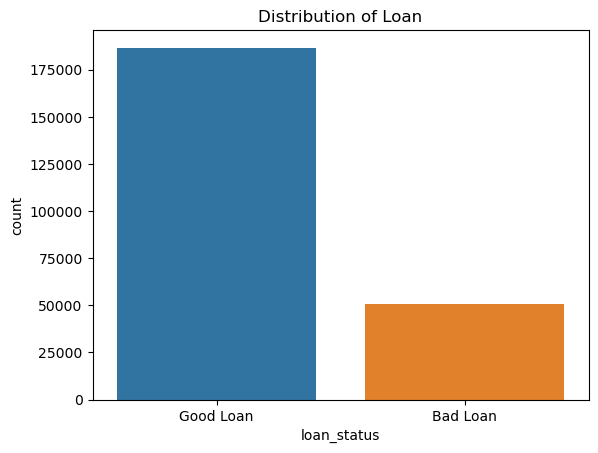

In [50]:
# loan status
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan')
plt.show()

In [51]:
# categorical col
df.select_dtypes(include='object').nunique()

grade                   7
sub_grade              35
emp_length             12
home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              2
purpose                 6
addr_state             50
initial_list_status     2
dtype: int64

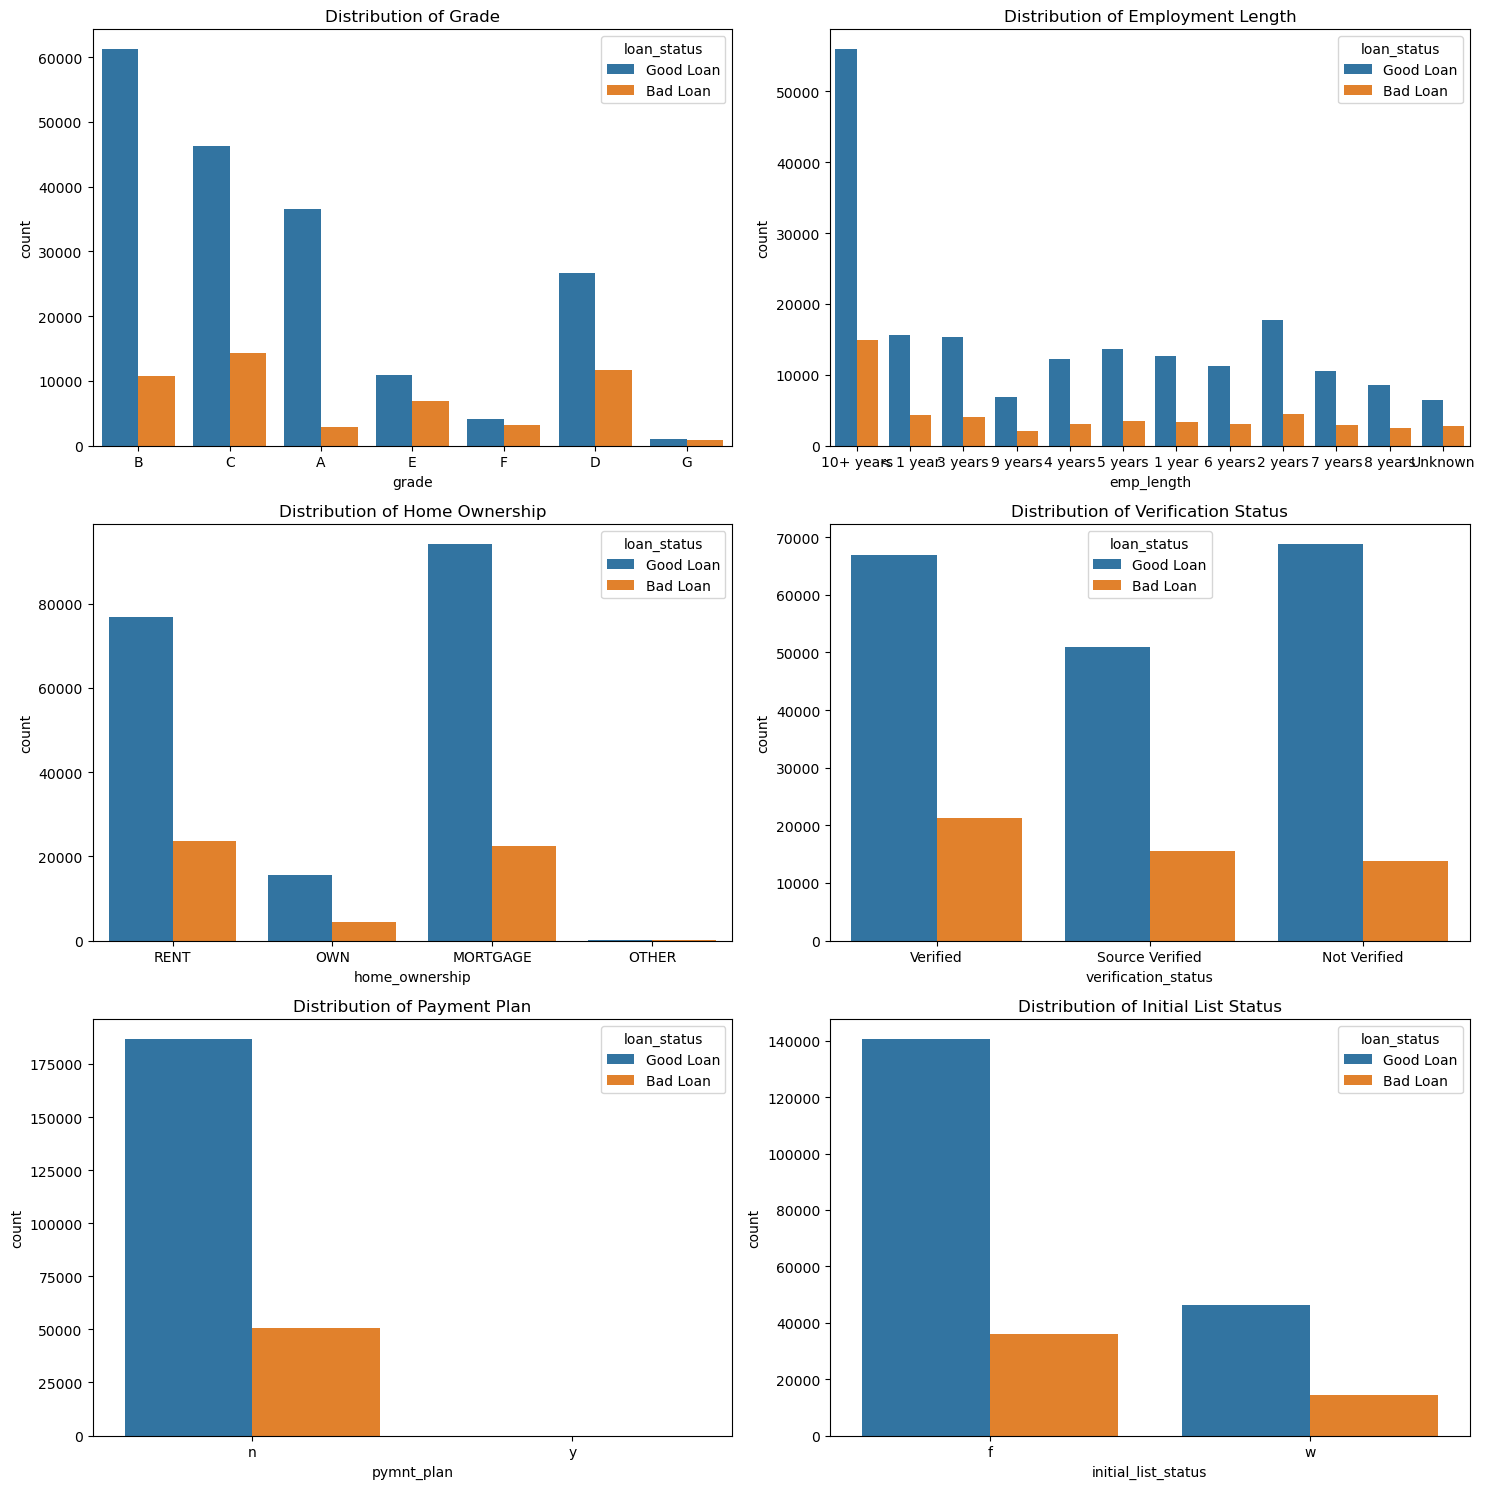

In [52]:
# Grade, Employment Length, Home Ownership, Verification Status, Payment Plan, and Initial List Status - loan_status

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot for Grade
sns.countplot(x='grade', hue='loan_status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Grade')

# Plot for Employment Length
sns.countplot(x='emp_length', hue='loan_status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Employment Length')

# Plot for Home Ownership
sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Home Ownership')

# Plot for Verification Status
sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Verification Status')

# Plot for Payment Plan
sns.countplot(x='pymnt_plan', hue='loan_status', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Payment Plan')

# Plot for Initial List Status
sns.countplot(x='initial_list_status', hue='loan_status', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Initial List Status')

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
# numerical col
print(df.select_dtypes(exclude='object').nunique())
num_col = df.select_dtypes(exclude='object')

loan_amnt                       1310
funded_amnt                     1313
funded_amnt_inv                 9558
term                               2
int_rate                         505
installment                    43676
annual_inc                     18631
issue_d                           91
dti                             3908
delinq_2yrs                       23
earliest_cr_line                 634
inq_last_6mths                    28
mths_since_last_delinq           125
open_acc                          57
pub_rec                           12
revol_bal                      46369
revol_util                      1202
total_acc                        102
out_prncp                       7424
out_prncp_inv                   7452
total_rec_prncp                50168
total_rec_late_fee              4998
recoveries                     22505
collection_recovery_fee        20091
last_pymnt_d                      98
last_credit_pull_d               103
collections_12_mths_ex_med         7
m

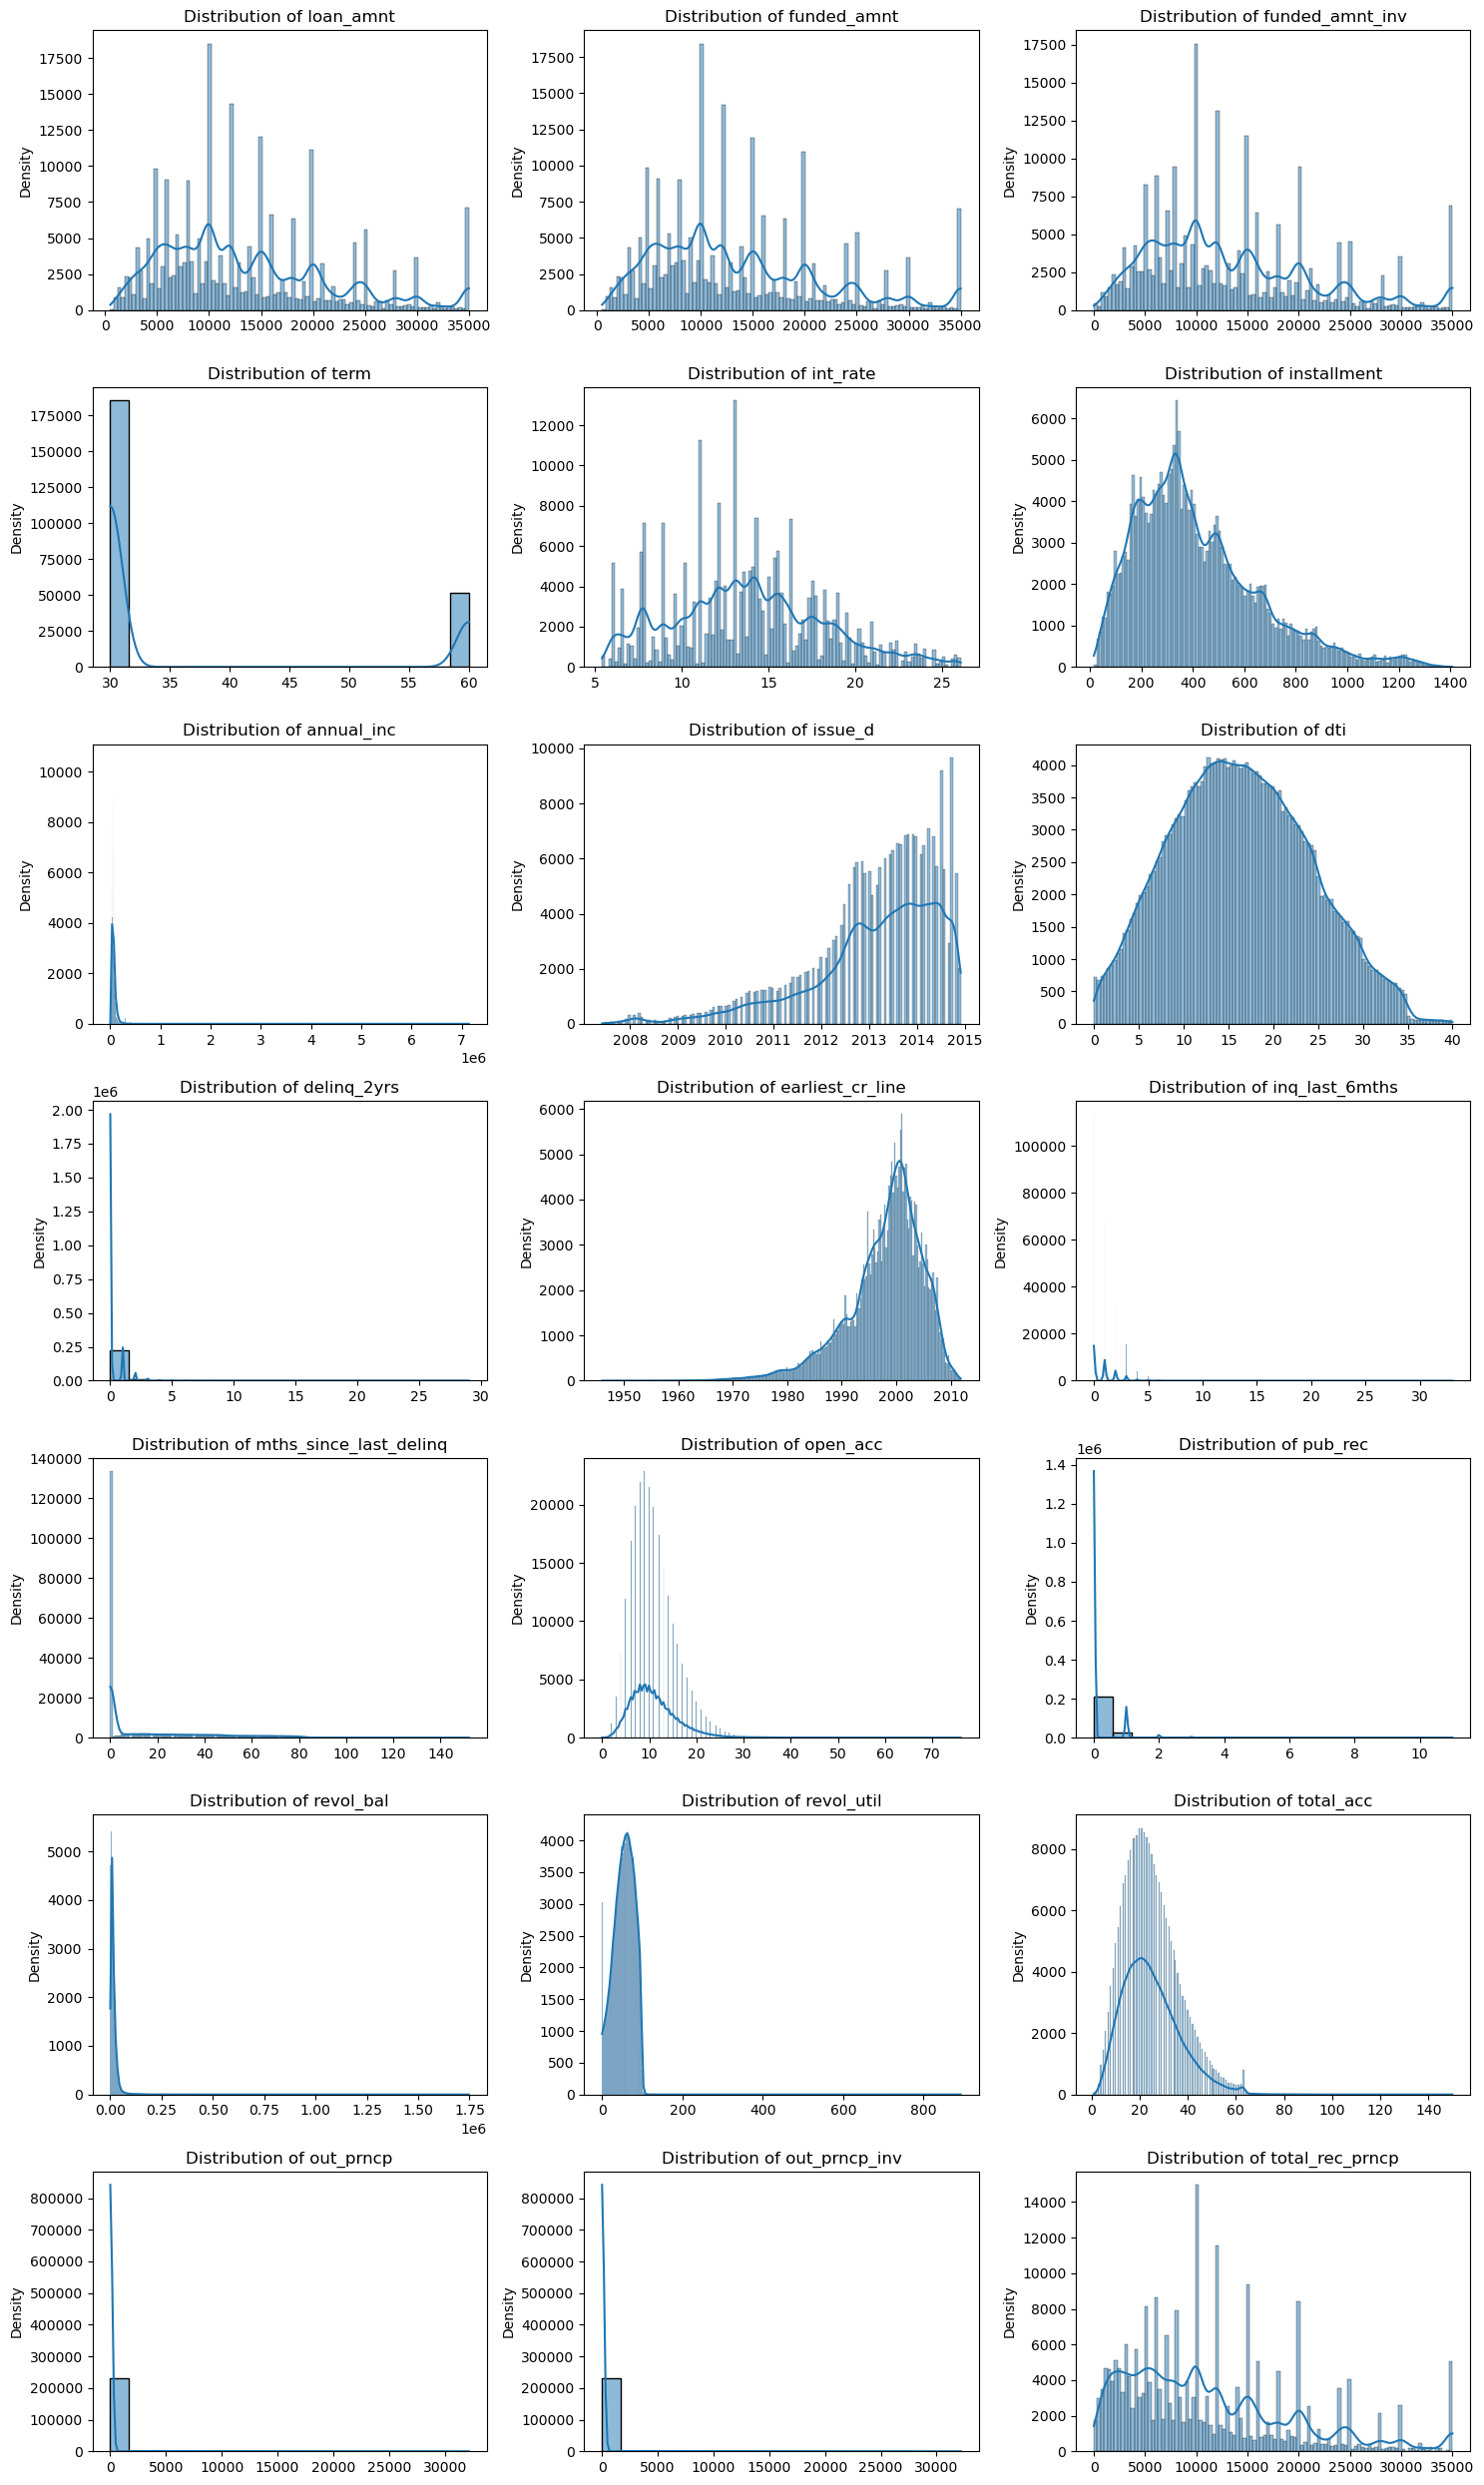

In [54]:
# Set up the grid for subplots
num_plots = len(num_col.columns)
num_rows = 7
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot distplot for 21 numerical column
for i, col in enumerate(num_col.columns[:21]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Hide the remaining empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

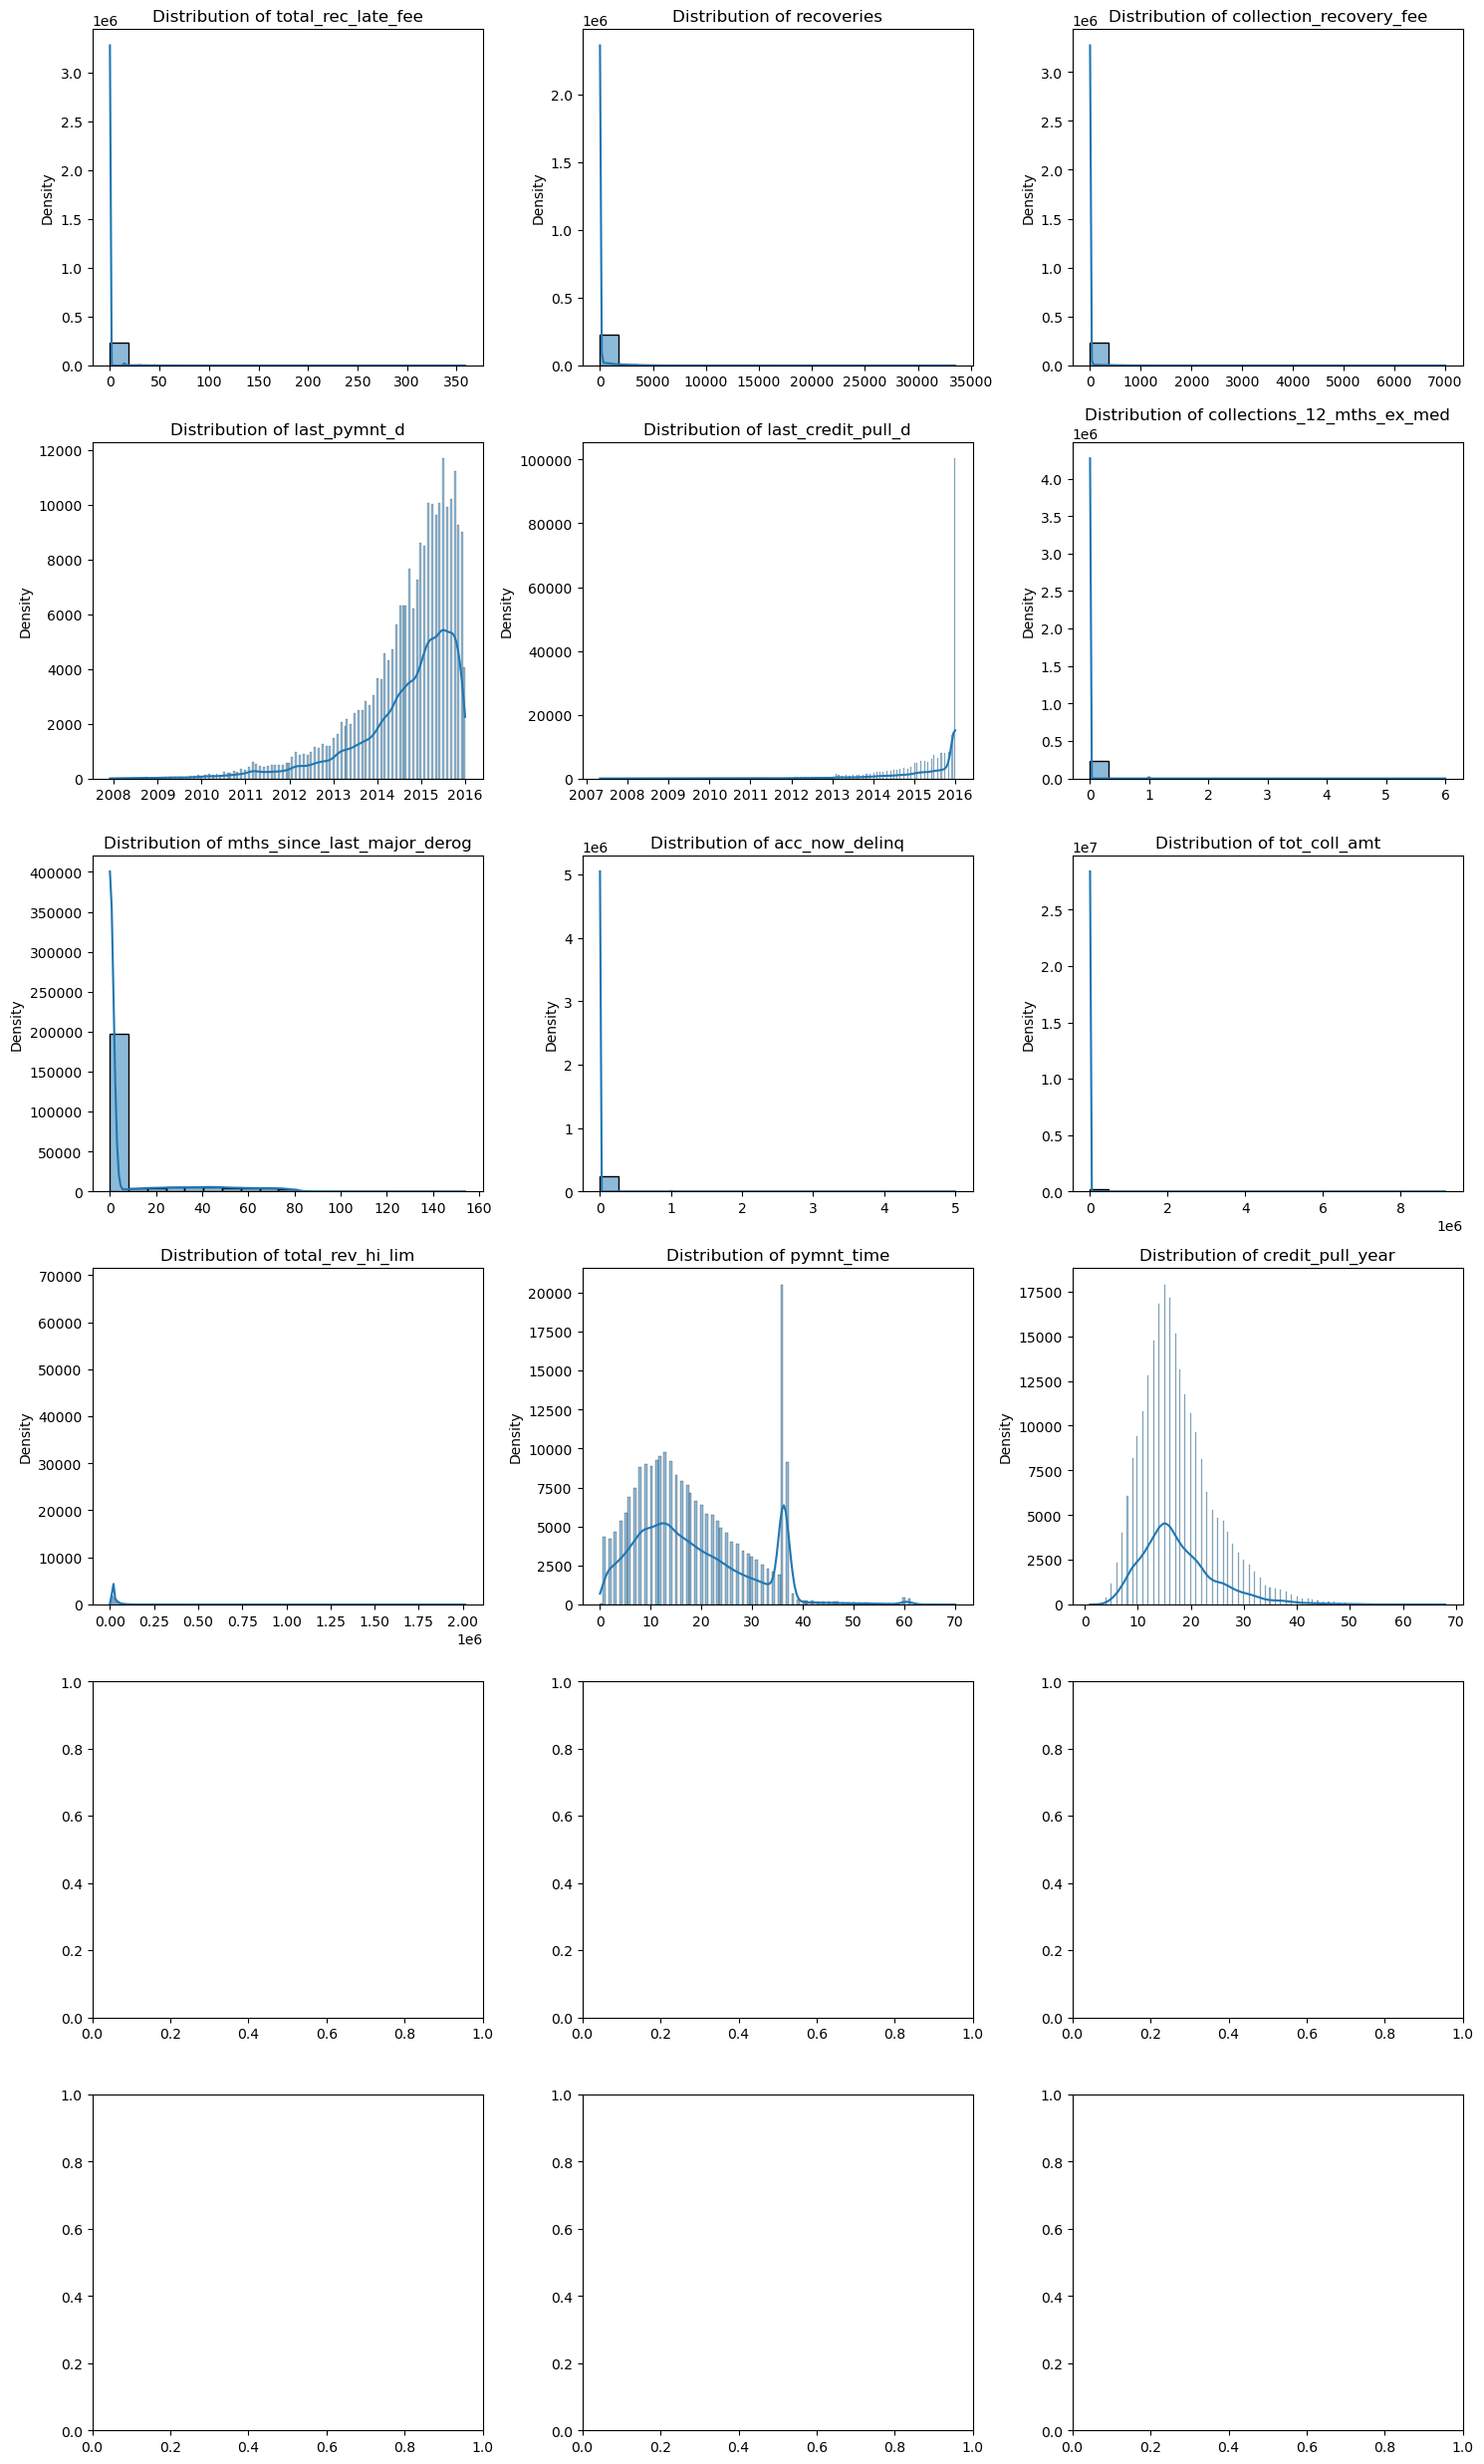

In [55]:
# Set up the grid for subplots
num_plots = len(num_col.columns)
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot distplot for 21 numerical column
for i, col in enumerate(num_col.columns[21:]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Hide the remaining empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [56]:
# Mendapatkan daftar kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

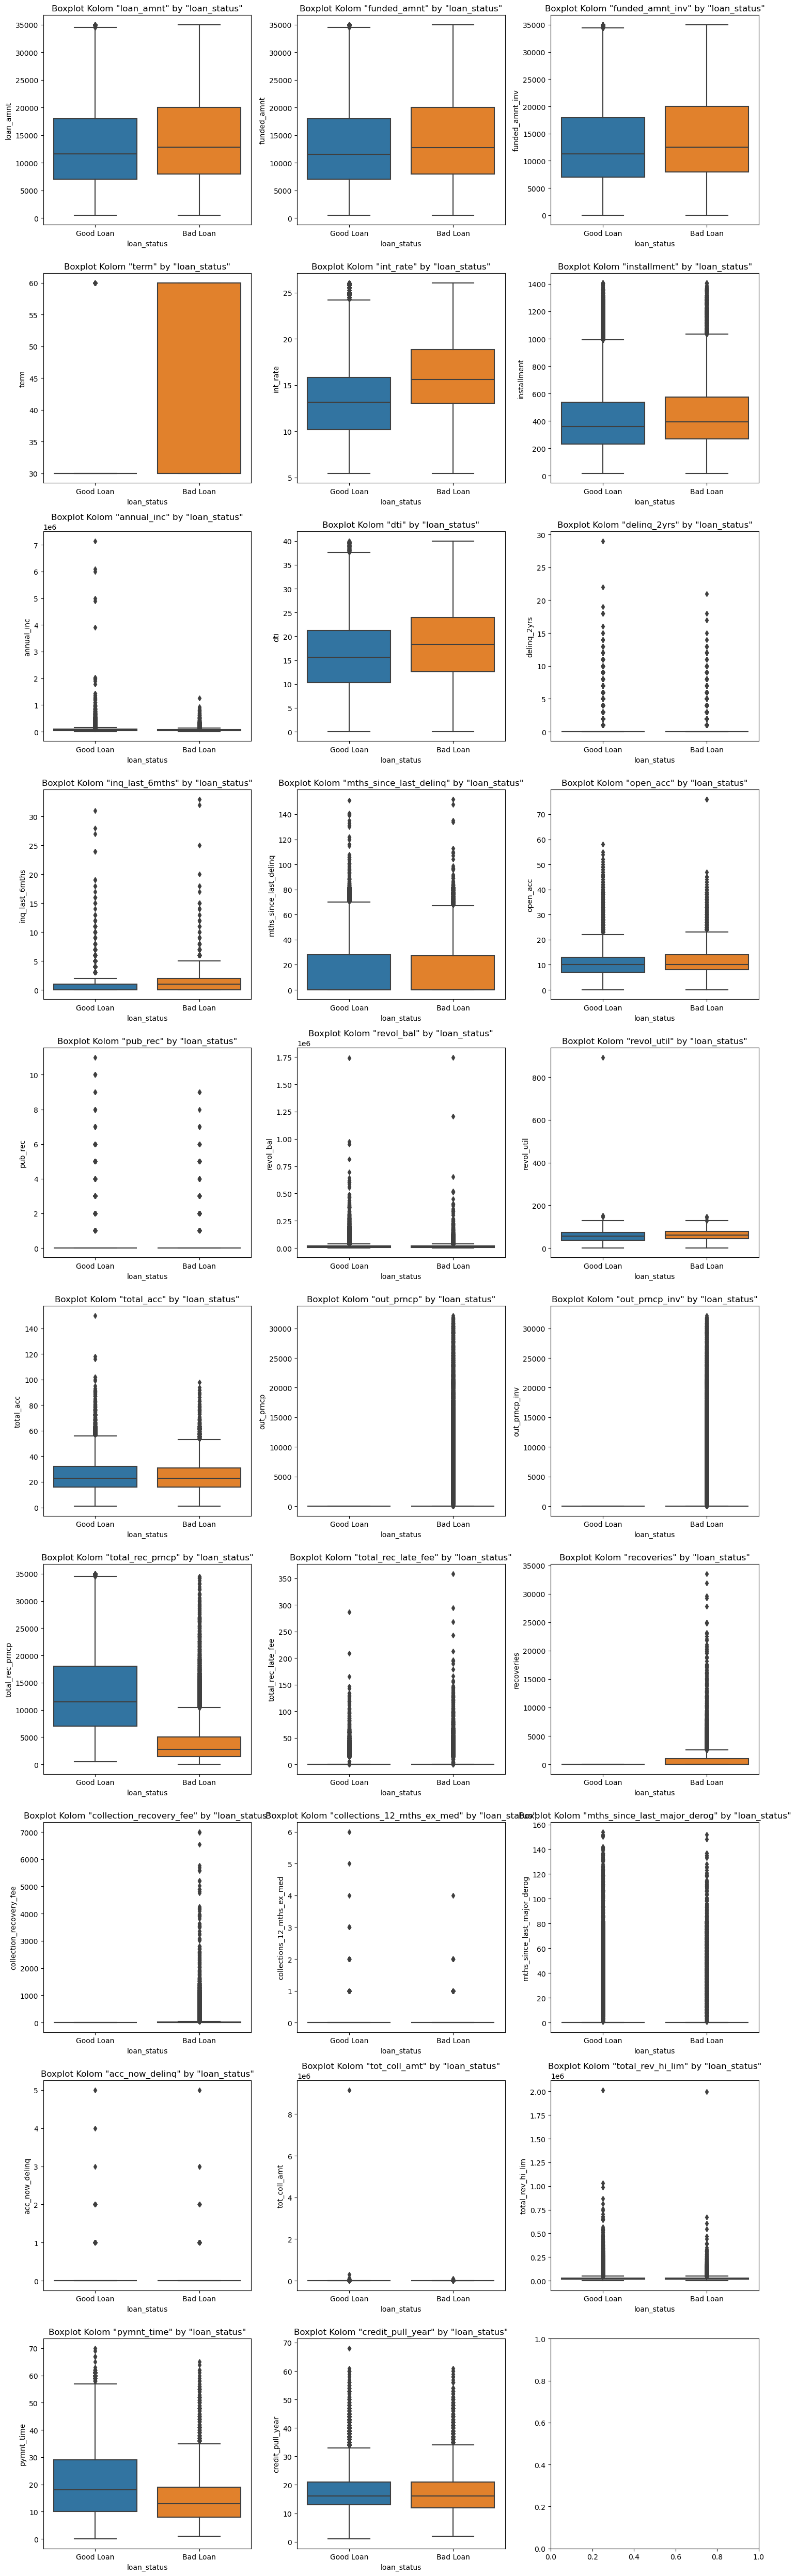

In [57]:
# Mengatur jumlah subplot per baris
num_cols_per_row = 3

# Menghitung jumlah baris yang diperlukan
num_rows = (len(numeric_columns) + num_cols_per_row - 1) // num_cols_per_row

# Membuat subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5*num_rows))

# Loop melalui setiap kolom numerik dan membuat boxplot berdasarkan 'Churn'
for i, col in enumerate(numeric_columns):
    ax = axes[i//num_cols_per_row, i%num_cols_per_row]
    sns.boxplot(x='loan_status', y=col, data=df, ax=ax)
    ax.set_title(f'Boxplot Kolom "{col}" by "loan_status"')

# Mengatur layout
plt.tight_layout()
plt.show()

In [58]:
outliers_col = ['installment','annual_inc','open_acc','revol_bal','revol_util','total_rec_late_fee','tot_coll_amt',
                'total_rev_hi_lim','credit_pull_year']

In [59]:
# displays the correlation between features
def top_correlation(df, n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                    .stack()
                    .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns = ["Variable_1", "Variable_2", "Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index(drop=True)
    return correlation.head(n)

num_df = df[numeric_columns]
top_correlation(num_df, 50)

,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999999
1,loan_amnt,funded_amnt,0.997280
2,funded_amnt,funded_amnt_inv,0.992205
3,loan_amnt,funded_amnt_inv,0.988877
4,funded_amnt,installment,0.959584
5,loan_amnt,installment,0.955484
6,funded_amnt_inv,installment,0.951210
7,recoveries,collection_recovery_fee,0.799465
8,funded_amnt,total_rec_prncp,0.762002
9,loan_amnt,total_rec_prncp,0.760042


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237268 entries, 0 to 237694
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    237268 non-null  int64         
 1   funded_amnt                  237268 non-null  int64         
 2   funded_amnt_inv              237268 non-null  float64       
 3   term                         237268 non-null  int64         
 4   int_rate                     237268 non-null  float64       
 5   installment                  237268 non-null  float64       
 6   grade                        237268 non-null  object        
 7   sub_grade                    237268 non-null  object        
 8   emp_length                   237268 non-null  object        
 9   home_ownership               237268 non-null  object        
 10  annual_inc                   237268 non-null  float64       
 11  verification_status          23

In [61]:
# drop datetime columns
df.drop(columns=df.select_dtypes(include='datetime64'),inplace=True)

In [62]:
df.nunique()

loan_amnt                       1310
funded_amnt                     1313
funded_amnt_inv                 9558
term                               2
int_rate                         505
installment                    43676
grade                              7
sub_grade                         35
emp_length                        12
home_ownership                     4
annual_inc                     18631
verification_status                3
loan_status                        2
pymnt_plan                         2
purpose                            6
addr_state                        50
dti                             3908
delinq_2yrs                       23
inq_last_6mths                    28
mths_since_last_delinq           125
open_acc                          57
pub_rec                           12
revol_bal                      46369
revol_util                      1202
total_acc                        102
initial_list_status                2
out_prncp                       7424
o

### Handling Outliers

In [63]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

#filtered_entries = np.array([True] * len(df))
for col in outliers_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) 
    
df = df.loc[filtered_entries].reset_index(drop=True)
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 237268
Jumlah baris setelah memfilter outlier: 229820


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229820 entries, 0 to 229819
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    229820 non-null  int64  
 1   funded_amnt                  229820 non-null  int64  
 2   funded_amnt_inv              229820 non-null  float64
 3   term                         229820 non-null  int64  
 4   int_rate                     229820 non-null  float64
 5   installment                  229820 non-null  float64
 6   grade                        229820 non-null  object 
 7   sub_grade                    229820 non-null  object 
 8   emp_length                   229820 non-null  object 
 9   home_ownership               229820 non-null  object 
 10  annual_inc                   229820 non-null  float64
 11  verification_status          229820 non-null  object 
 12  loan_status                  229820 non-null  object 
 13 

## Modelling

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

In [66]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status'].apply(lambda x: 1 if x == 'Good Loan' else 0)

# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Bagi data sisa menjadi data validasi dan data pengujian
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.375, random_state=42)

# membagi jenis kolom
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [67]:
# Numerical
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Categorical
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [68]:
# Random Forest
RF = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector',SelectKBest(score_func=f_classif, k=20)),
    ('clf', RandomForestClassifier(n_jobs=-1,random_state=42))])

RF.fit(X_train, y_train)

cv_results = cross_validate(RF,X_train,y_train,cv=5,scoring=['accuracy','recall'])
print('Accuracy : ',cv_results['test_accuracy'].mean())
print('Recall : ',cv_results['test_recall'].mean())

Accuracy :  0.9677573644405267
Recall :  0.9830647388163122


In [69]:
print("\nRandom Forest:")

# Val_Accuracy
val_accuracy = RF.score(X_val, y_val)
print(f"\nVal Accuracy : {(val_accuracy)*100} %")

# Recall
predict_val = RF.predict(X_val)
val_recall = recall_score(y_val,predict_val,average='weighted')
print(f"Val Recall : {(val_recall)*100} %")

# Test Acc
predict_test = RF.predict(X_test)
test_accuracy = RF.score(X_test, y_test)
print(f"\nTest Accuracy : {(test_accuracy)*100} %")

# Recall Test
test_recall = recall_score(y_test,predict_test,average='weighted')
print(f"Test Recall : {(test_recall)*100} %")

print("\nClassification Report:")
print(classification_report(y_test, predict_test))
pd.crosstab(y_test,predict_test,colnames=['Predicted'],margins=True)


Random Forest:

Val Accuracy : 96.83056304934297 %
Val Recall : 96.83056304934297 %

Test Accuracy : 96.80329533257913 %
Test Recall : 96.80329533257913 %

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7326
           1       0.98      0.98      0.98     27147

    accuracy                           0.97     34473
   macro avg       0.96      0.95      0.95     34473
weighted avg       0.97      0.97      0.97     34473



Predicted,0,1,All
loan_status,,,
0,6677,649,7326
1,453,26694,27147
All,7130,27343,34473


In [74]:
# Logistic Regression
LR = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector',SelectKBest(score_func=f_classif, k=20)),
    ('clf', LogisticRegression(n_jobs=-1,random_state=42))])

LR.fit(X_train, y_train)

cv_results = cross_validate(LR,X_train,y_train,cv=5,scoring=['accuracy','recall'])
print('Accuracy : ',cv_results['test_accuracy'].mean())
print('Recall : ',cv_results['test_recall'].mean())

Accuracy :  0.9354349780258365
Recall :  0.9452208916524256


In [75]:
print("\nLogistic Regression:")

# Val_Accuracy
val_accuracy = LR.score(X_val, y_val)
print(f"Val Accuracy : {(val_accuracy)*100} %")

# Recall
predict_val = LR.predict(X_val)
val_recall = recall_score(y_val,predict_val,average='weighted')
print(f"Val Recall : {(val_recall)*100} %")

# Test Acc
predict_test = LR.predict(X_test)
test_accuracy = LR.score(X_test, y_test)
print(f"\nTest Accuracy : {(test_accuracy)*100} %")

# Recall Test
test_recall = recall_score(y_test,predict_test,average='weighted')
print(f"Test Recall : {(test_recall)*100} %")

print("\nClassification Report:")
print(classification_report(y_test, predict_test))
pd.crosstab(y_test,predict_test,colnames=['Predicted'],margins=True)


Logistic Regression:
Val Accuracy : 93.4557479766774 %
Val Recall : 93.4557479766774 %

Test Accuracy : 93.53987178371479 %
Test Recall : 93.53987178371479 %

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7326
           1       0.97      0.95      0.96     27147

    accuracy                           0.94     34473
   macro avg       0.89      0.92      0.91     34473
weighted avg       0.94      0.94      0.94     34473



Predicted,0,1,All
loan_status,,,
0,6591,735,7326
1,1492,25655,27147
All,8083,26390,34473


In [76]:
# XGBoost
XGB = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('selector',SelectKBest(score_func=f_classif, k=20)),
    ('clf', XGBClassifier(n_jobs=-1,random_state=42))])

XGB.fit(X_train, y_train)

cv_results = cross_validate(XGB,X_train,y_train,cv=5,scoring=['accuracy','recall'])
print('Acc : ',cv_results['test_accuracy'].mean())
print('Recall : ',cv_results['test_recall'].mean())

Acc :  0.9797595249886527
Recall :  0.9899513153399566


In [77]:
print("XGBoost Classifier:")

# Val_Accuracy
val_accuracy = XGB.score(X_val, y_val)
print(f"Val Accuracy : {(val_accuracy)*100} %")

# Recall
predict_val = XGB.predict(X_val)
val_recall = recall_score(y_val,predict_val,average='weighted')
print(f"Val Recall : {(val_recall)*100} %")

# Test Acc
predict_test = XGB.predict(X_test)
test_accuracy = XGB.score(X_test, y_test)
print(f"\nTest Accuracy : {(test_accuracy)*100} %")

# Recall Test
test_recall = recall_score(y_test,predict_test,average='weighted')
print(f"Test Recall : {(test_recall)*100} %")

print("\nClassification Report:")
print(classification_report(y_test, predict_test))
pd.crosstab(y_test,predict_test,colnames=['Predicted'],margins=True)

XGBoost Classifier:
Val Accuracy : 97.84004873379166 %
Val Recall : 97.84004873379166 %

Test Accuracy : 97.87949989847127 %
Test Recall : 97.87949989847127 %

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7326
           1       0.98      0.99      0.99     27147

    accuracy                           0.98     34473
   macro avg       0.97      0.96      0.97     34473
weighted avg       0.98      0.98      0.98     34473



Predicted,0,1,All
loan_status,,,
0,6860,466,7326
1,265,26882,27147
All,7125,27348,34473


## Model Interpretation

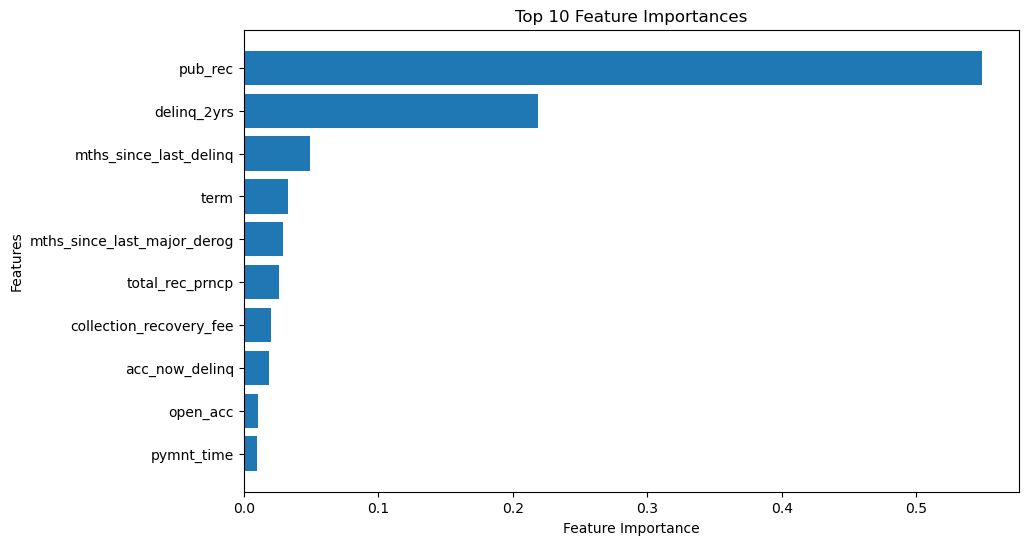

In [93]:
# Access the XGBoost model from the pipeline
xgb_model = XGB.named_steps['clf']

# Get selected features after preprocessing
selected_features_indices = XGB.named_steps['selector'].get_support(indices=True)

# Ensure selected_features_indices does not exceed the number of columns in X
selected_features_indices = selected_features_indices[selected_features_indices < X_train.shape[1]]

# Get selected feature names
selected_features = [X.columns[idx] for idx in selected_features_indices]

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Sort indices of features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Get top 10 most important features and their importances
num_selected_features = min(len(selected_features), 10)
top_features = [selected_features[idx] for idx in sorted_indices if idx < len(selected_features)][:num_selected_features]
top_importances = feature_importances[sorted_indices][:num_selected_features]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()